<a href="https://colab.research.google.com/github/kakdevedant2018/PML/blob/main/DGA_detection_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.read_csv("dga_data.csv")

In [ ]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df

,isDGA,domain,host,subclass
0,dga,6xzxsw3sokvg1tc752y1a6p0af,6xzxsw3sokvg1tc752y1a6p0af.com,gameoverdga
1,dga,glbtlxwwhbnpxs,glbtlxwwhbnpxs.ru,cryptolocker
2,dga,xxmamopyipbfpk,xxmamopyipbfpk.ru,cryptolocker
3,dga,zfd5szpi18i85wj9uy13l69rg,zfd5szpi18i85wj9uy13l69rg.net,newgoz
4,dga,jpqftymiuver,jpqftymiuver.ru,cryptolocker
...,...,...,...,...
159995,legit,manhunt,manhunt.net,alexa
159996,legit,yupptv,yupptv.com,alexa
159997,legit,bbcmundo,bbcmundo.com,legit
159998,legit,kanogames,kanogames.com,legit


In [ ]:
df= df.drop(["domain"],axis=1)

In [ ]:
df=df.drop(["subclass"],axis=1)

In [ ]:
df

,isDGA,host
0,dga,6xzxsw3sokvg1tc752y1a6p0af.com
1,dga,glbtlxwwhbnpxs.ru
2,dga,xxmamopyipbfpk.ru
3,dga,zfd5szpi18i85wj9uy13l69rg.net
4,dga,jpqftymiuver.ru
...,...,...
159995,legit,manhunt.net
159996,legit,yupptv.com
159997,legit,bbcmundo.com
159998,legit,kanogames.com


In [ ]:
df["num_characters"]=df["host"].apply(len)

In [ ]:
df['Vowels'] = df.host.str.lower().str.count(r'[aeiou]')

In [ ]:
df['Consonant'] = df.host.str.lower().str.count(r'[a-z]') - df['Vowels']

In [ ]:
df

,isDGA,host,num_characters,Vowels,Consonant
0,dga,6xzxsw3sokvg1tc752y1a6p0af.com,30,4,16
1,dga,glbtlxwwhbnpxs.ru,17,1,15
2,dga,xxmamopyipbfpk.ru,17,4,12
3,dga,zfd5szpi18i85wj9uy13l69rg.net,29,4,14
4,dga,jpqftymiuver.ru,15,4,10
...,...,...,...,...,...
159995,legit,manhunt.net,11,3,7
159996,legit,yupptv.com,10,2,7
159997,legit,bbcmundo.com,12,3,8
159998,legit,kanogames.com,13,5,7


# Feature Generation
used to extract the features.

The linguistic features are 
1. length 
2. Meaningful word Ratio
3. Percentage of Numerical character
4. Pronounceability score
5. Percentage of length of the largest meaningful Sring
6. Levenshtein edit distance
7. Unique Character rate
8. vowel count
9. entropy


# Length
The length of the domain name |d| is an important feature.The most DGA domain have greateer length thatn normal domain thus it introduced as a feature.
As the length increases probability of being DGA domain are also increase.


# Meaningful word ratio:
It is the ratio of number of meaningful words in a domain name to the total length of the domain name.
The words in the domain name are compared to the standard meaningful word list and ratio is calculated.
DGA domain have less meaningful words than legitimate domain names.

#  Unique character rate.
It is the measure of unique characters and if lower unique character rate implies a DGA domain.


In [ ]:
# df["Unique Character rate"] = len(set(df["host"]))/df["host"].str.len()

In [ ]:
s = "paraaag"
print(len(set(s))/len(s))

0.5714285714285714


In [ ]:
len(set(df["host"]))

159235

In [ ]:
l=[]

In [ ]:
for i in df["host"]:
  l.append(len(set(i)))

In [ ]:
l[0]

23

In [ ]:
l1=[]

In [ ]:
for i in df["host"]:
  l1.append(len(i))

In [ ]:
k=[]
for i in range(160000 ):
  j=l[i]/l1[i]
  k.append(j)
df["Unique characters ratio"]=k

In [ ]:
l1[1]

17

In [ ]:
l[1]

13

In [ ]:
l1[0]

30

In [ ]:
df

,isDGA,host,num_characters,Vowels,Consonant,Unique Character rate,Unique characters ratio
0,dga,6xzxsw3sokvg1tc752y1a6p0af.com,30,4,16,5307.833333,0.766667
1,dga,glbtlxwwhbnpxs.ru,17,1,15,9366.764706,0.764706
2,dga,xxmamopyipbfpk.ru,17,4,12,9366.764706,0.764706
3,dga,zfd5szpi18i85wj9uy13l69rg.net,29,4,14,5490.862069,0.793103
4,dga,jpqftymiuver.ru,15,4,10,10615.666667,0.866667
...,...,...,...,...,...,...,...
159995,legit,manhunt.net,11,3,7,14475.909091,0.727273
159996,legit,yupptv.com,10,2,7,15923.500000,0.900000
159997,legit,bbcmundo.com,12,3,8,13269.583333,0.666667
159998,legit,kanogames.com,13,5,7,12248.846154,0.769231


# Percentage of numerical characters:


In [ ]:
host =[]

In [ ]:
for i in df["host"]:
  host.append(i)

In [ ]:
host

['6xzxsw3sokvg1tc752y1a6p0af.com',
 'glbtlxwwhbnpxs.ru',
 'xxmamopyipbfpk.ru',
 'zfd5szpi18i85wj9uy13l69rg.net',
 'jpqftymiuver.ru',
 'takenroll.net',
 'vrrtneoswsds.ru',
 'mzapiwbcsbqiyxnlxa1hprx8n.com',
 'xkoihiygtanuio.ru',
 'dreamdont.net',
 'visitshot.net',
 'lpeespobepdxy.ru',
 'wcsdwvdbpimqg.ru',
 'rcdqeqmpxgdiuqombhuwcfu.ru',
 'cmkrdurmtrhjylp.ru',
 'plsibgabyyjbjc.ru',
 'qrnafqrigldcjaa.ru',
 'n3m4txqpb6a415iwzkrmdzgk6.com',
 '1rw1pc44mkxp4qjx18qua26.net',
 'itpkkibmmxao.ru',
 'putisrswuvpk.ru',
 '1x75xo41t4fno51wc86e1y4s13d.net',
 'mostjune.net',
 '1y6oppp7k3pwfpo2sfmkloyxa.biz',
 'kctkokkiiavumpq.ru',
 'dtfbtfrobxlle.ru',
 'fairslow.net',
 'sfmbdpnijlarq.cc',
 'vdqqfdcax.im',
 'svwivgcgkbgt.ru',
 '1t5fkef5u26di8wtme9ezjamn.com',
 'bfxfbdutaessry.ru',
 'aedwiugahlyv.ru',
 'njtvrfhfaklho.sc',
 'qulohywkisgu.org',
 '14ua4ir7rwqzv15mes59zpel1a.net',
 '130qnn0srp6su1bosz2z19gx1a7.net',
 'wawft814u5se21tmptb51yy47q2.org',
 'by86yc1p7f81d1tb5g7h1el8t9k.org',
 'jxnpnxdgmunsxah.ru',


In [ ]:
alpha=[]
numeric=[]
for i in host:
  c_alpha=0
  c_digit=0
  for j in i:
    if j.isdigit():
      c_digit+=1
    else:
      c_alpha+=1
  alpha.append(c_alpha)
  numeric.append(c_digit)
  
  #res.append[int(i) for i  in   if i.isdigit()]


In [ ]:
per_n_c=[]
for i in range(len(alpha)):
  per_n_c.append(alpha[i]/alpha[i]+numeric[i])


In [ ]:
df["percentage of numeric characters"]=per_n_c

# Shannon Entropy 

In [56]:
from collections import Counter
from math import log
def shannon(string):
  counts = Counter(string)
  frequencies = ((i / len(string)) for i in counts.values())
  return - sum(f * log(f, 2) for f in frequencies)
#s = lambda i : - sum(f * log(f, 2) for f in ((j / len(i)) for j in Counter(i).values()))



In [59]:
s_list=[]
for i in df["host"]:
  s_list.append(shannon(i))
df["Shannon_Entropy"]=s_list

In [60]:
df

,isDGA,host,num_characters,Vowels,Consonant,Unique Character rate,Unique characters ratio,percentage of numeric characters,Shannon_Entropy
0,dga,6xzxsw3sokvg1tc752y1a6p0af.com,30,4,16,5307.833333,0.766667,10.0,4.440224
1,dga,glbtlxwwhbnpxs.ru,17,1,15,9366.764706,0.764706,1.0,3.616875
2,dga,xxmamopyipbfpk.ru,17,4,12,9366.764706,0.764706,1.0,3.572469
3,dga,zfd5szpi18i85wj9uy13l69rg.net,29,4,14,5490.862069,0.793103,11.0,4.444188
4,dga,jpqftymiuver.ru,15,4,10,10615.666667,0.866667,1.0,3.640224
...,...,...,...,...,...,...,...,...,...
159995,legit,manhunt.net,11,3,7,14475.909091,0.727273,1.0,2.845351
159996,legit,yupptv.com,10,2,7,15923.500000,0.900000,1.0,3.121928
159997,legit,bbcmundo.com,12,3,8,13269.583333,0.666667,1.0,2.918296
159998,legit,kanogames.com,13,5,7,12248.846154,0.769231,1.0,3.238901


# Percentage of length of largest meaningful string

# Vowel count

## Number of periods

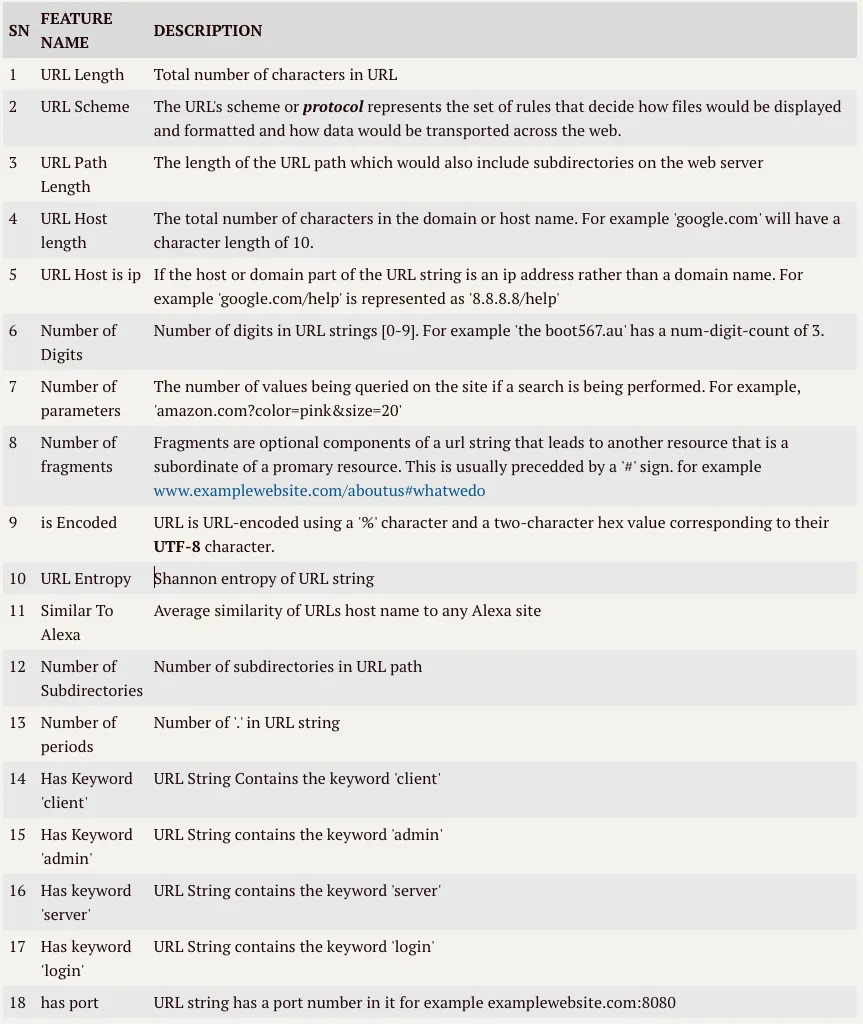

# Entropy:
### It is the measure of randomness that is DGA domain has higher uncertainity than of normal domain.
## In DGA there is no meaningful pattern.
 

In [40]:
import pandas as pd
import scipy.stats

def ent(data):
    """Calculates entropy of the passed `pd.Series`
    """
    p_data = data.value_counts()           # counts occurrence of each value
    entropy = scipy.stats.entropy(p_data)  # get entropy from counts
    return entropy

In [ ]:
for i in df["host"]:
  list_of_characters = []
  for j in i:
    list_of_characters.append(j)
  
  

  df1 = pd.DataFrame(list_of_characters, columns=['values'])

  res = df1['values'].value_counts().to_frame().reset_index().sort_values('index')
  ent(res)

In [ ]:
df["host"][0]

In [ ]:
from sklearn.model_selection import train_test_split



In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [52]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [53]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)


In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:

performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [ ]:
performance_df1


In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()